# Analysis of Capstone 2

In this notebook, I'll be using the K-Means algorithm in order to find stellar clusters in my Gaia data subset. 

In [1]:
import numpy as np
import pandas as pd
import pickle

# Load in the data:
with open('Data/cleaned_dataframe_subset.pkl', 'rb') as f:
    df = pickle.load(f)

df.head(7)

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,duplicated_source,radial_velocity,radial_velocity_error,teff_val,lum_val,subset,r_est,r_lo,r_hi
0,575388179144704,46.586249,0.451140,1.489403,0.566506,0.245852,0.652412,6.959413,0.939823,-2.869646,0.892436,False,NaN,NaN,NaN,NaN,1.0,1116.827227,748.928101,1713.798538
1,575456898624000,46.629160,0.585416,1.500458,0.636628,3.538279,0.767726,11.109998,1.269826,-15.447752,1.211021,False,NaN,NaN,NaN,NaN,1.0,296.639704,232.068021,408.570033
2,575559977808000,46.619333,0.111619,1.517034,0.108919,1.543781,0.138637,-7.319485,0.202482,-13.131690,0.207530,False,NaN,NaN,4092.17725,0.085104,1.0,636.392779,583.107495,700.057416
3,575559977809920,46.624884,0.293061,1.521894,0.335015,0.667886,0.426745,11.569505,0.653785,2.405117,0.614614,False,NaN,NaN,NaN,NaN,1.0,1076.209874,768.773445,1590.773702
6,575628697283456,46.684003,0.507014,1.514996,0.562390,0.671345,0.669175,3.062812,1.096600,-5.161016,1.044574,False,NaN,NaN,NaN,NaN,1.0,952.605502,629.470827,1517.572847
7,575663057019136,46.660431,0.428231,1.505106,0.506110,1.649634,0.633313,1.398725,0.957734,1.455517,0.965698,False,NaN,NaN,NaN,NaN,1.0,612.514394,425.308370,993.700453
8,575663057021312,46.663176,0.409746,1.512559,0.452759,0.793609,0.541798,3.835206,0.900692,-5.055062,0.868309,False,NaN,NaN,NaN,NaN,1.0,951.716897,656.389168,1467.806195


In [2]:
from sklearn.cluster import KMeans

# Build the features column, denoted X, with the 5 variables I wish to use for modeling:
X = df[['ra', 'dec', 'r_est', 'pmra', 'pmdec']]
print(X.shape)

(144806, 5)


In [3]:
# Try my first attempt at a *very* basic KMeans solution, using just 2 clusters:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

labels = kmeans.predict(X)
centers = kmeans.cluster_centers_
print(labels[0:20])
print(centers)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0]
[[  45.84710659   16.30048311 1862.56493344    2.8867366    -3.50612891]
 [  45.60336553   13.73308782  765.27456966    6.24248135   -7.48683748]]


In [4]:
df.loc[:, 'labels'] = labels.copy()

In [5]:
df.head(10)

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,...,duplicated_source,radial_velocity,radial_velocity_error,teff_val,lum_val,subset,r_est,r_lo,r_hi,labels
0,575388179144704,46.586249,0.451140,1.489403,0.566506,0.245852,0.652412,6.959413,0.939823,-2.869646,...,False,NaN,NaN,NaN,NaN,1.0,1116.827227,748.928101,1713.798538,1
1,575456898624000,46.629160,0.585416,1.500458,0.636628,3.538279,0.767726,11.109998,1.269826,-15.447752,...,False,NaN,NaN,NaN,NaN,1.0,296.639704,232.068021,408.570033,1
2,575559977808000,46.619333,0.111619,1.517034,0.108919,1.543781,0.138637,-7.319485,0.202482,-13.131690,...,False,NaN,NaN,4092.17725,0.085104,1.0,636.392779,583.107495,700.057416,1
3,575559977809920,46.624884,0.293061,1.521894,0.335015,0.667886,0.426745,11.569505,0.653785,2.405117,...,False,NaN,NaN,NaN,NaN,1.0,1076.209874,768.773445,1590.773702,1
6,575628697283456,46.684003,0.507014,1.514996,0.562390,0.671345,0.669175,3.062812,1.096600,-5.161016,...,False,NaN,NaN,NaN,NaN,1.0,952.605502,629.470827,1517.572847,1
7,575663057019136,46.660431,0.428231,1.505106,0.506110,1.649634,0.633313,1.398725,0.957734,1.455517,...,False,NaN,NaN,NaN,NaN,1.0,612.514394,425.308370,993.700453,1
8,575663057021312,46.663176,0.409746,1.512559,0.452759,0.793609,0.541798,3.835206,0.900692,-5.055062,...,False,NaN,NaN,NaN,NaN,1.0,951.716897,656.389168,1467.806195,1
9,575697416760832,46.667729,0.370422,1.516735,0.374226,1.051860,0.445161,11.847218,0.826480,-5.844509,...,False,NaN,NaN,NaN,NaN,1.0,854.429413,618.123184,1274.059233,1
10,575697416763776,46.662205,0.118184,1.522609,0.123541,0.262377,0.150933,1.268180,0.248033,0.384804,...,False,NaN,NaN,NaN,NaN,1.0,2063.871411,1655.938736,2634.184563,0
11,575697416796288,46.671067,0.360059,1.522019,0.380800,0.438873,0.457596,2.213634,0.784292,-0.130535,...,False,NaN,NaN,NaN,NaN,1.0,1186.178810,835.373893,1754.354613,1


In [6]:
df.describe()

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,radial_velocity_error,teff_val,lum_val,subset,r_est,r_lo,r_hi,labels
count,1.448060e+05,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,2884.000000,2884.000000,38264.000000,27605.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000
mean,5.806292e+16,45.667128,0.364385,14.404714,0.311368,1.266455,0.429614,5.364624,0.776553,-6.445491,0.693967,2.624768,2.116272,4937.922456,3.374990,1.502293,1052.323837,821.602990,1432.487008,0.738623
std,5.448575e+16,2.705760,0.364798,10.360857,0.301396,1.398750,0.425948,14.789071,0.783741,12.691960,0.744909,36.033567,2.545359,608.842748,25.048640,0.499996,610.957379,520.527775,765.761830,0.439387
min,5.753882e+14,39.397370,0.016614,1.215032,0.013412,0.000027,0.019115,-220.151361,0.032469,-924.894224,0.029633,-214.838053,0.110120,3243.000000,0.029058,1.000000,8.607152,8.600576,8.613737,0.000000
25%,3.330647e+15,43.320436,0.094899,4.130097,0.080073,0.469400,0.111194,-0.240062,0.197310,-9.062746,0.168166,-18.595147,0.658322,4623.054203,0.227252,1.000000,630.238163,455.751966,872.145084,0.000000
50%,1.108307e+17,46.204723,0.237451,22.350257,0.204065,0.907139,0.280981,2.936788,0.494771,-4.112792,0.419626,3.976430,1.304933,4972.500000,0.566464,2.000000,929.940575,680.813133,1391.978277,1.000000
75%,1.122491e+17,47.919100,0.522795,24.612546,0.456171,1.631365,0.621832,8.022298,1.091172,-0.958761,0.926415,23.855239,2.495388,5325.000000,1.430993,2.000000,1342.008153,1063.006154,1845.257483,1.000000
max,1.496924e+17,65.555744,3.681530,27.274562,2.391855,116.153585,4.106983,1741.859304,5.136050,223.695497,4.661877,242.938548,19.906323,9632.666990,1796.698970,2.000000,7101.204768,6356.833734,8021.140696,1.000000


In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3-D spatial plot of the two clusters, using the labels generated by KMeans:
df_cluster1 = df.loc[df.labels==0]
df_cluster2 = df.loc[df.labels==1]
df = df.drop(['labels'], axis=1)    # No longer need these labels 

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster1['ra'], df_cluster1['dec'], df_cluster1['r_est'], c='blue', s=60, alpha=0.3)
ax.scatter(df_cluster2['ra'], df_cluster2['dec'], df_cluster2['r_est'], c='red', s=60, alpha=0.3)
plt.show()

<Figure size 1000x1000 with 1 Axes>

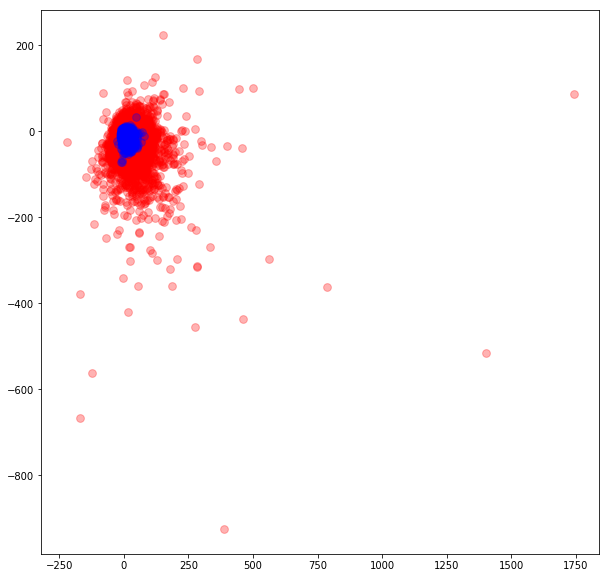

In [8]:
# Now create a 2-D velocity plot of the above clusters:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_cluster1['pmra'], df_cluster1['pmdec'], c='blue', s=60, alpha=0.3,zorder=3)
ax.scatter(df_cluster2['pmra'], df_cluster2['pmdec'], c='red', s=60, alpha=0.3,zorder=2)
#ax.scatter(centers2[:,0], centers2[:,1], centers2[:,2], c='black', s=80, alpha=1.0, marker='D', zorder=1)
plt.show()

Well, the first attempt at clustering was less than stellar (pun intended). I think an issue I ran into here is one I'll need to deal with now, as it will plague the algorithm moving forward -- more specifically, the fact that the units for each of the variables are very different, making their ranges to be very different. This in turn weights some of the variables more than others. So I think the best solution (at least to start) is to put the different variables into units that are more comparable. However, I do want to at least try to preserve the physicality of the units, rather than arbitrarily inflating or deflating any.

To begin, I'll alter the units of ra and dec into arcminutes from degrees, and convert the proper motions (pmra and pmdec) into true velocities in kilometers per second.

In [9]:
# Alter the units of ra and dec to be in arcminutes, rather than degrees:
X.loc[:,'ra'] *= 60.0
X.loc[:,'dec'] *= 60.0
X.head(10)

,ra,dec,r_est,pmra,pmdec
0,2795.174925,89.364166,1116.827227,6.959413,-2.869646
1,2797.749576,90.027473,296.639704,11.109998,-15.447752
2,2797.160004,91.022040,636.392779,-7.319485,-13.131690
3,2797.493060,91.313632,1076.209874,11.569505,2.405117
6,2801.040203,90.899756,952.605502,3.062812,-5.161016
7,2799.625852,90.306388,612.514394,1.398725,1.455517
8,2799.790550,90.753546,951.716897,3.835206,-5.055062
9,2800.063739,91.004125,854.429413,11.847218,-5.844509
10,2799.732321,91.356554,2063.871411,1.268180,0.384804
11,2800.263996,91.321165,1186.178810,2.213634,-0.130535


In [10]:
def pm_to_v(pm, d):
    """
    Converts a proper motion column to a velocity column, requiring the distance
    in parsecs. Assumes the proper motions have units of milliarcseconds per year 
    (mas/yr).
    """
    pm_arcsec = pm * 1.0e-3     # Converting to arc seconds per year
    v = pm_arcsec * 4.74 * d    # Answer in kilometers per second
    
    return v

# Convert the proper motions to velocities:
X.loc[:, 'pmra'] = pm_to_v(df.pmra, df.r_est)
X.loc[:, 'pmdec'] = pm_to_v(df.pmdec, df.r_est)

In [11]:
X.describe()

,ra,dec,r_est,pmra,pmdec
count,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000
mean,2740.027666,864.282840,1052.323837,19.873426,-24.176676
std,162.345598,621.651438,610.957379,36.505126,33.730821
min,2363.842205,72.901926,8.607152,-180.094581,-672.998768
25%,2599.226142,247.805818,630.238163,-1.173514,-37.211261
50%,2772.283401,1341.015440,929.940575,13.738820,-18.702958
75%,2875.145999,1476.752773,1342.008153,33.846675,-4.684253
max,3933.344644,1636.473705,7101.204768,774.429205,241.439190


This looks better. It's certainly not perfect, but the orders of magnitude are more comparable, certainly in the spatial dimensions. Let's attempt to do the KMeans again, this time using the adjusted units:

In [12]:
# Second attempt at a 2 cluster algorithm:
kmeans2 = KMeans(n_clusters=2, random_state=42).fit(X)

labels2 = kmeans2.predict(X)
centers2 = kmeans2.cluster_centers_
print(labels2[0:20])
print(centers2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[2723.4290818   243.12339045  963.1150127    23.50928844  -25.71747806]
 [2756.46654607 1479.46574413 1140.67433088   16.27254591  -22.65069987]]


In [13]:
X.loc[:, 'labels'] = labels2.copy()

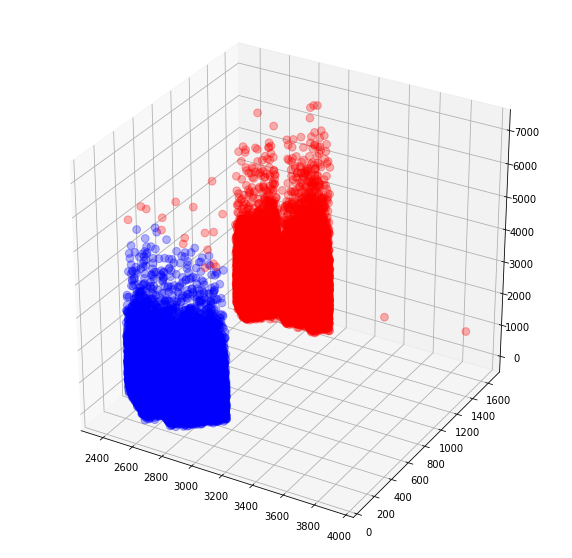

In [14]:
df_cluster1 = X.loc[X.labels==0]
df_cluster2 = X.loc[X.labels==1]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster1['ra'], df_cluster1['dec'], df_cluster1['r_est'], c='blue', s=60, alpha=0.3,zorder=3)
ax.scatter(df_cluster2['ra'], df_cluster2['dec'], df_cluster2['r_est'], c='red', s=60, alpha=0.3,zorder=2)
ax.scatter(centers2[:,0], centers2[:,1], centers2[:,2], c='black', s=80, alpha=1.0, marker='D', zorder=1)
plt.show()

This still isn't perfect, as one of the clusters bled into the other section of data, but overall this looks better. Before making more adjustments, let's see what happens with a higher number of clusters:

In [15]:
X = X.drop(['labels'], axis=1)
X.head()

,ra,dec,r_est,pmra,pmdec
0,2795.174925,89.364166,1116.827227,36.841470,-15.191223
1,2797.749576,90.027473,296.639704,15.621460,-21.720655
2,2797.160004,91.022040,636.392779,-22.079240,-39.611767
3,2797.493060,91.313632,1076.209874,59.018763,12.269067
6,2801.040203,90.899756,952.605502,13.829670,-23.303793


In [16]:
# This time, I'll set the number of clusters to 4 rather than 2:
kmeans4 = KMeans(n_clusters=4, random_state=42, max_iter=30000).fit(X)

labels4 = kmeans4.predict(X)
centers4 = kmeans4.cluster_centers_
print(labels4[0:20])
print(centers4)

[3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 1 3 3 1]
[[2751.73662271 1478.59052907  843.51685567   15.46032517  -21.39229155]
 [2725.7060677   243.33944732 1684.5139912    31.85395998  -34.42349308]
 [2770.02070466 1476.13826972 2017.26524087   18.8577142   -26.52754346]
 [2722.58927069  243.01289111  693.14118827   20.38617224  -22.4550925 ]]


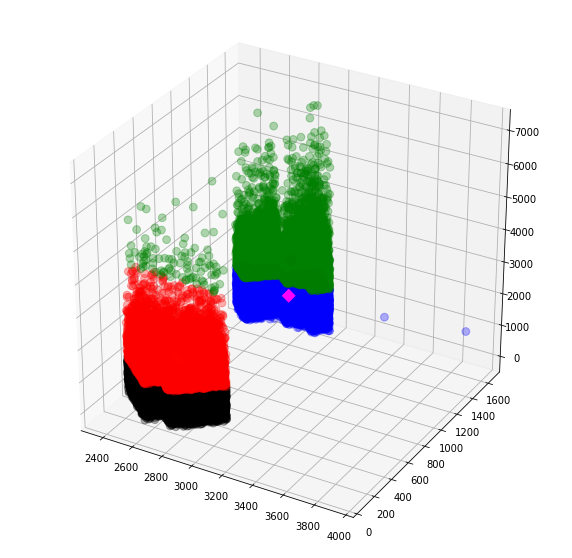

In [17]:
df.loc[:, 'labels'] = labels4.copy()
df_cluster1 = X.loc[df.labels==0]
df_cluster2 = X.loc[df.labels==1]
df_cluster3 = X.loc[df.labels==2]
df_cluster4 = X.loc[df.labels==3]
df = df.drop(['labels'], axis=1)

# Spatial plot:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster1['ra'], df_cluster1['dec'], df_cluster1['r_est'], c='blue', s=60, alpha=0.3)
ax.scatter(df_cluster2['ra'], df_cluster2['dec'], df_cluster2['r_est'], c='red', s=60, alpha=0.3)
ax.scatter(df_cluster3['ra'], df_cluster3['dec'], df_cluster3['r_est'], c='green', s=60, alpha=0.3)
ax.scatter(df_cluster4['ra'], df_cluster4['dec'], df_cluster4['r_est'], c='black', s=60, alpha=0.3)
ax.scatter(centers4[:,0], centers4[:,1], centers4[:,2], c='magenta', s=80, alpha=1.0, marker='D', zorder=1)
plt.show()

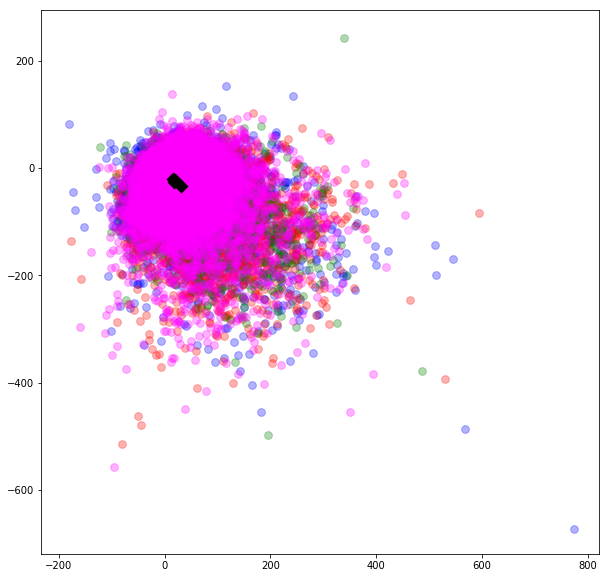

In [18]:
# Velocity plot:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_cluster1['pmra'], df_cluster1['pmdec'], c='blue', s=60, alpha=0.3)
ax.scatter(df_cluster2['pmra'], df_cluster2['pmdec'], c='red', s=60, alpha=0.3)
ax.scatter(df_cluster3['pmra'], df_cluster3['pmdec'], c='green', s=60, alpha=0.3)
ax.scatter(df_cluster4['pmra'], df_cluster4['pmdec'], c='magenta', s=60, alpha=0.3)
ax.scatter(centers4[:,3], centers4[:,4], c='black', s=80, alpha=1.0, marker='D', zorder=1)
plt.show()

Spatially, these clusters map well, with the exception of the third cluster (in green). However, the velocities have extremely high dispersions, and seem to not separate out at all from one cluster to the next. From a data science standpoint, that isn't necessarily a problem, because that's just how the data comes out. Unfortunately, this does not work from the astronomical point of view -- clusters should be moving somewhat together, and so we need to make sure there's some actual separation in this 2-D velocity space.

Let's see what happens if I just cluster using the velocities and ignore the spatial dimensions:

In [19]:
# X2 is just the velocity data; still use 4 clusters:
X2 = X[['pmra', 'pmdec']]
kmeans_pm = KMeans(n_clusters=4, random_state=42).fit(X2)
labels_pm = kmeans_pm.predict(X2)
centers_pm= kmeans_pm.cluster_centers_
print(centers_pm)

[[  -2.45737663  -49.61376395]
 [ 130.86865567 -137.03679597]
 [  59.87907538  -28.82025688]
 [   9.40345878   -6.11486837]]


/Users/danielfeldman/anaconda/envs/gaia/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/danielfeldman/anaconda/envs/gaia/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


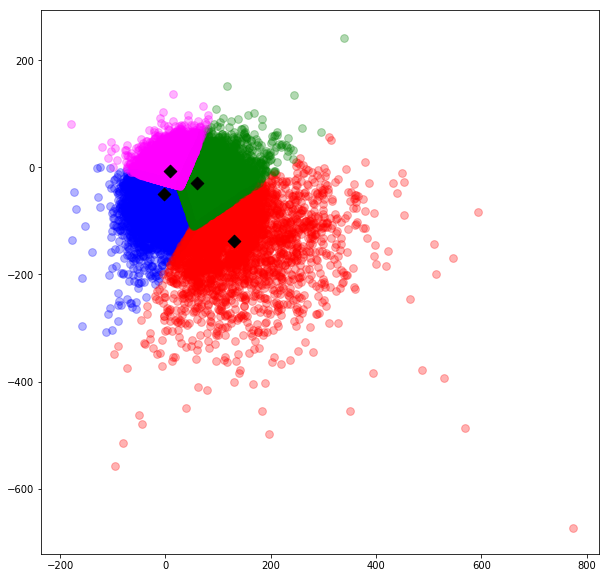

In [20]:
X2.loc[:, 'labels'] = labels_pm.copy()
df_cluster1 = X2.loc[X2.labels==0]
df_cluster2 = X2.loc[X2.labels==1]
df_cluster3 = X2.loc[X2.labels==2]
df_cluster4 = X2.loc[X2.labels==3]

# Plot the velocities:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_cluster1['pmra'], df_cluster1['pmdec'], c='blue', s=60, alpha=0.3)
ax.scatter(df_cluster2['pmra'], df_cluster2['pmdec'], c='red', s=60, alpha=0.3)
ax.scatter(df_cluster3['pmra'], df_cluster3['pmdec'], c='green', s=60, alpha=0.3)
ax.scatter(df_cluster4['pmra'], df_cluster4['pmdec'], c='magenta', s=60, alpha=0.3)
ax.scatter(centers_pm[:,0], centers_pm[:,1], c='black', s=80, alpha=1.0, marker='D', zorder=1)
plt.show()

Beautiful. Now the question is, what does this type of separation look like spatially?

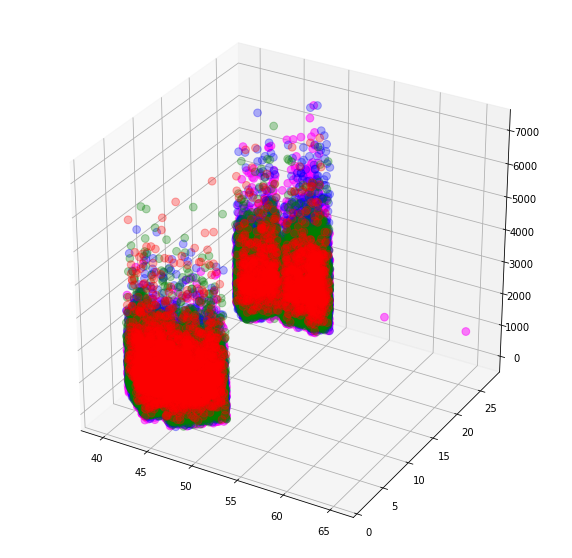

In [21]:
spatial1 = df.loc[X2.labels==0]
spatial2 = df.loc[X2.labels==1]
spatial3 = df.loc[X2.labels==2]
spatial4 = df.loc[X2.labels==3]

# Spatial plot using the same velocity clusters:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(spatial1['ra'], spatial1['dec'], spatial1['r_est'], c='blue', s=60, alpha=0.3)
ax.scatter(spatial2['ra'], spatial2['dec'], spatial2['r_est'], c='red', s=60, alpha=0.3)
ax.scatter(spatial3['ra'], spatial3['dec'], spatial3['r_est'], c='green', s=60, alpha=0.3)
ax.scatter(spatial4['ra'], spatial4['dec'], spatial4['r_est'], c='magenta', s=60, alpha=0.5)
#ax.scatter(centers4[:,0], centers4[:,1], centers4[:,2], c='magenta', s=80, alpha=1.0, marker='D', zorder=1)
plt.show()

So now we have the opposite problem: if you focus on the velocity features, the spatial ones become a mess. This isn't unexpected, but was still worth checking. Somehow to make this clustering algorithm work, I'll have to find a way to get around this problem.

Before I tackle that, I want to find a good way to pick k. After all, I don't know how many clusters to expect in my data subset, and I shouldn't just be picking an arbitrary number. Normally, a good method for choosing k is the elbow method, so I'll start there.

In [22]:
# Try an elbow method:
scores = []
X_n = X[['pmra', 'pmdec']]  # Still using just the velocity features for now
k_vals = range(2,30,2)      # Here I'll plot up scores for k from 2 to 28 in intervals of 2
for k in k_vals:
    score_n = KMeans(n_clusters=k, random_state=42).fit(X_n).score(X_n)
    scores.append(score_n)

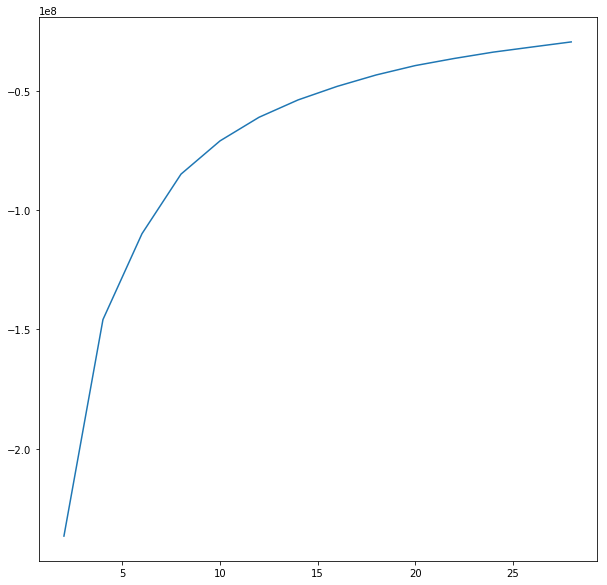

In [23]:
# Plot up the elbow graph:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(k_vals, scores)
plt.show()

Well, there isn't really that much of a clear elbow here. I don't know if I can say it satisfactorally levels off, but I'll pick 18 as a good cutoff, as the slope's rate of change does seem to at least slow down.

In [24]:
from time import perf_counter as timer

# Based on the elbow, let's go with, say, 18:
X18 = X[['pmra', 'pmdec']]

begin_time = timer()
kmeans18 = KMeans(n_clusters=18, random_state=42).fit(X18)
labels_18 = kmeans18.predict(X18)
end_time = timer()
print('Time elapsed: {} seconds'.format((end_time-begin_time)))

Time elapsed: 42.60716433100015 seconds


/Users/danielfeldman/anaconda/envs/gaia/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/danielfeldman/anaconda/envs/gaia/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


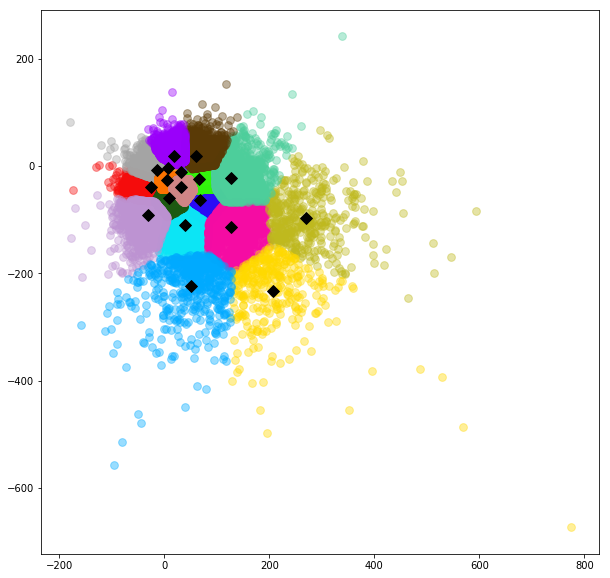

In [25]:
# Define 18 colors for the plotting:
colors = {'p':'#7741C8', 'r':'#F50C0C', 'm':'#F50CA3', 'b':'#2B0CF5', 'c':'#0CE5F5', 'l':'#33F50C', 't':'#4DCE9B',
          'g':'#1D5911', 'y':'#BFB91E', 'o':'#F2A52A', 'k':'#A4A4A4', 'w':'#5A3A06', 'v':'#BD93D2', 'd':'#FFD900',
          'n':'#FF7300', 'e':'#9A00FA', 'j':'#00AAFF', 's':'#D18787'}
colkeys = ['p', 'r', 'o', 'b', 'c', 'm', 'g', 'y', 'l', 'k', 't', 'w', 'v', 'd', 'n', 'e', 'j', 's']

# Labels and cluster centers:
X18.loc[:, 'labels'] = labels_18.copy()
centers18 = kmeans18.cluster_centers_

# Velocity plot:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for i in range(18):
    cluster = X18.loc[X18.labels==i]
    ax.scatter(cluster['pmra'], cluster['pmdec'], c=colors[colkeys[i]], s=60, alpha=0.4)
ax.scatter(centers18[:,0], centers18[:,1], c='black', s=70, alpha=1.0, marker='D', zorder=1)
plt.show()

This looks like a good number of clusters, well separated in velocity space. There are definitely a number of outliers moving quickly, which could cause some issues with results, but we will examine that later. Let's check on the clusters in the spatial dimensions:

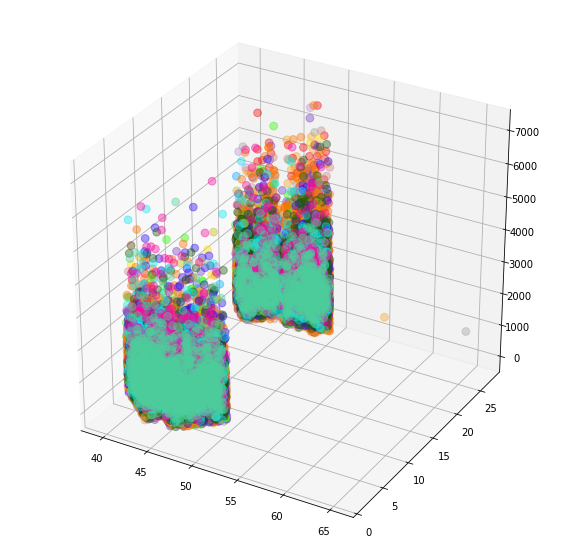

In [26]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(18):
    cluster = df.loc[X18.labels==i]
    ax.scatter(cluster['ra'], cluster['dec'], cluster['r_est'], c=colors[colkeys[i]], s=60, alpha=0.4)
plt.show()

As expected, the clusters are a mess in the 3 spatial dimensions. Let's try running KMeans on the spatial dimensions only and see how that looks:

In [27]:
# This time, we'll only fit with the spatial data:
X18_spatial = X[['ra', 'dec', 'r_est']]

begin_time = timer()
kmeans18_spatial = KMeans(n_clusters=18, random_state=42).fit(X18_spatial)
labels_18_spatial = kmeans18_spatial.predict(X18_spatial)
end_time = timer()
print('Time elapsed: {} seconds'.format((end_time-begin_time)))

Time elapsed: 22.315987109999696 seconds


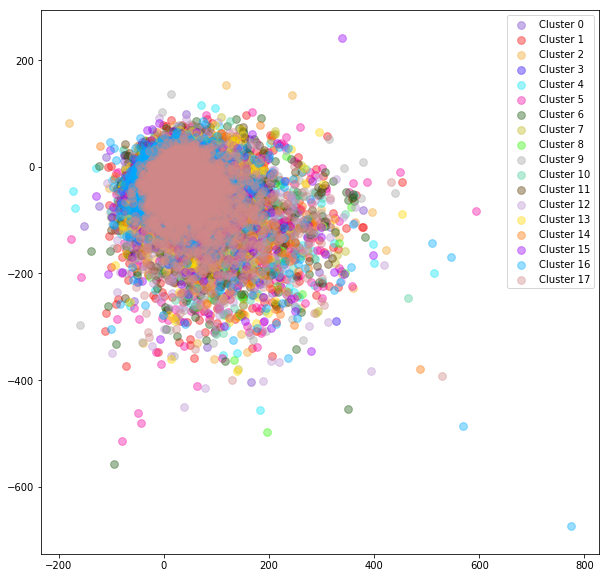

In [28]:
X.loc[:, 'labels'] = labels_18_spatial.copy()
#centers18_spatial = kmeans18_spatial.cluster_centers_

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for i in range(18):
    cluster = X.loc[X.labels==i]
    ax.scatter(cluster['pmra'], cluster['pmdec'], c=colors[colkeys[i]], s=60, alpha=0.4, 
               label='Cluster {}'.format(i))
#ax.scatter(centers18_spatial[:,3], centers18_spatial[:,4], c='black', s=70, alpha=1.0, marker='D', zorder=1)
plt.legend(loc='best')
plt.show()

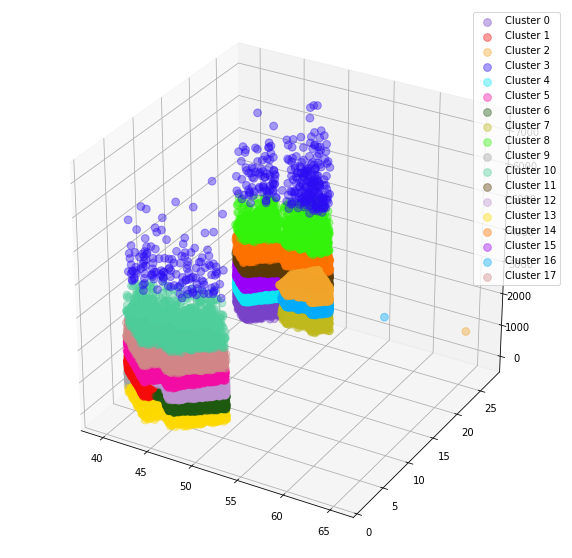

In [29]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(18):
    cluster = df.loc[X.labels==i]
    ax.scatter(cluster['ra'], cluster['dec'], cluster['r_est'], c=colors[colkeys[i]], s=60, alpha=0.4,
              label='Cluster {}'.format(i))
plt.legend(loc='best')
plt.show()

In a similarly expected result, in this case, the clusters are well separated in the three spatial dimensions but a complete mess in the two velocity dimensions. Though even here, there is an issue with the cluster farthest from Earth, which is in both subsets of data.

Ok, let's see now what happens if we fit with all 5 dimensions for the 18 cluster KMeans algorithm:

In [30]:
# This time, we'll try using all the data for fitting:
begin_time = timer()
kmeans18_total = KMeans(n_clusters=18, random_state=42).fit(X)
labels_18_total = kmeans18_total.predict(X)
end_time = timer()
print('Time elapsed: {} seconds'.format((end_time-begin_time)))

Time elapsed: 22.03445210200016 seconds


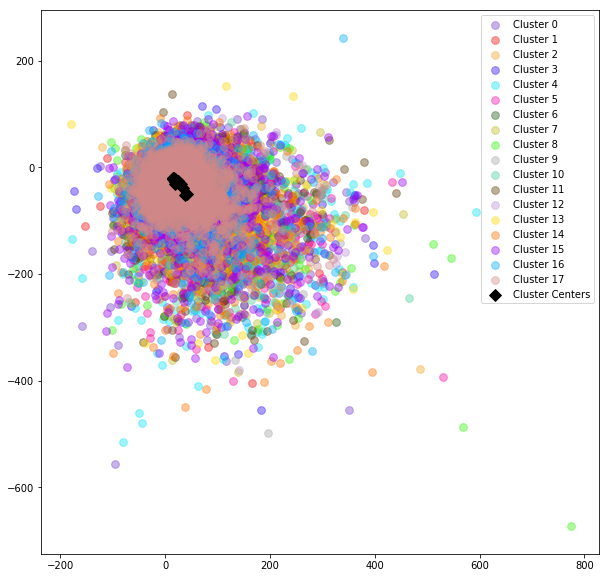

In [31]:
X.loc[:, 'labels'] = labels_18_total
centers18_total = kmeans18_total.cluster_centers_

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for i in range(18):
    cluster = X.loc[X.labels==i]
    ax.scatter(cluster['pmra'], cluster['pmdec'], c=colors[colkeys[i]], s=60, 
               alpha=0.4, label='Cluster {}'.format(i))
ax.scatter(centers18_total[:,3], centers18_total[:,4], c='black', s=70, alpha=1.0, 
           marker='D', zorder=1, label='Cluster Centers')
plt.legend(loc='best')
plt.show()

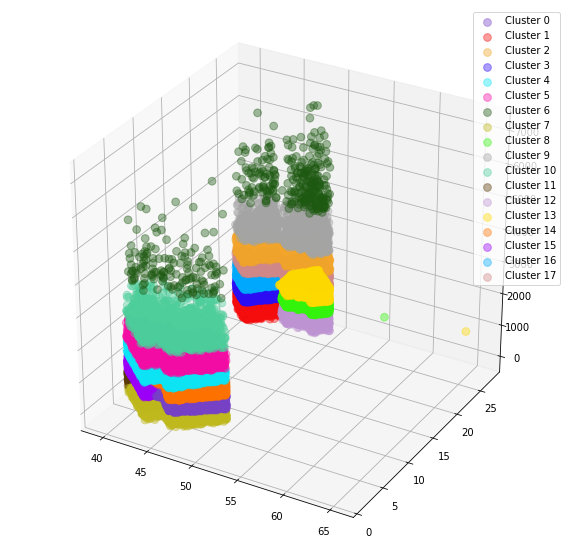

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(18):
    cluster = df.loc[X.labels==i]
    ax.scatter(cluster['ra'], cluster['dec'], cluster['r_est'], c=colors[colkeys[i]], s=60, alpha=0.4,
               label='Cluster {}'.format(i))
plt.legend(loc='best')
plt.show()

It would appear that when all 5 dimensions are used for fitting, the 3 spatial dimensions are favored enough that the results look very similar to the run where we didn't consider the velocity dimensions at all.

Time for a new strategy: two-step clustering. First, we will do a KMeans clustering algorithm with a k of 18, taking only the velocity dimensions into account. Then, we'll run a KMeans clustering algorithm on *each* of those 18 clusters, this time on only the spatial dimensions. This way, we should be able to get both of the strategies above to be employed, and should allow us to have clusters that separate well in all 5 dimensions.

In [33]:
# New idea: Two-step clustering. First, we cluster by 2-D velocity space. Then, we separate each cluster
# into individual datasets, and cluster them based on the 3-D spacial data.

# First, the initial velocity clustering. I'll choose 18 again based on the previous elbow analysis.
X_pm = X[['pmra', 'pmdec']]

begin_time = timer()
kmeans_pm = KMeans(n_clusters=18, random_state=42).fit(X_pm)
labels_pm = kmeans18.predict(X_pm)
end_time = timer()
print('Time elapsed: {} seconds'.format((end_time-begin_time)))

Time elapsed: 40.23287726599983 seconds


In [34]:
# Next, we separate the 18 clusters into separate datasets:
X_pm.loc[:, 'label'] = labels_pm.copy()

dfs = {}
for i in range(18):
    cluster = X.loc[X_pm.loc[:, 'label']==i, :].copy()
    dfs[i] = cluster[['ra', 'dec', 'r_est']]
print(dfs.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])


/Users/danielfeldman/anaconda/envs/gaia/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/danielfeldman/anaconda/envs/gaia/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [35]:
# For each cluster, we pick the ideal k based on elbow method and split:
spatial_ks = []

# For each individual cluster (of the 18)
for i in range(18):
    # Calculate the scores for sub clusters of k between 1 and 18:
    scores = np.ones(18)
    for j in range(1, 19):
        scores[j-1] = KMeans(n_clusters=j, random_state=42).fit(dfs[i]).score(dfs[i])
    
    # Normalize the scores:
    scores = scores / (np.min(scores)*-1.0)
    
    # Calculate the slope (change in the scores) to find the best k val:
    slopes = np.ones(17)
    for ind in range(17):
        slopes[ind] = scores[ind+1] - scores[ind]
    try:
        ideal_k = np.where(slopes < 0.003)[0][0] + 1
    except IndexError:
        print('Warning: Slope for subset {} never reached < 0.003! Setting to 18.'.format(i))
        print(slopes)
        ideal_k = 18
    spatial_ks.append(ideal_k)
print(spatial_ks)
total_clusters = sum(spatial_ks)
print(total_clusters)

[15, 15, 16, 15, 16, 14, 16, 14, 17, 15, 17, 16, 17, 15, 16, 16, 15, 16]
281


For each of the 18 velocity clusters, I needed a way to determine a good elbow without looking at every cluster (after all, eventually if scaled up, there would be *way* more than 18 individual clusters), so I measured the changing slope of the graph and set an arbitrary cutoff. In this case, the cutoff was a normalized slope lower than 0.003. The output above shows that the cutoff defined new k values between 14 and 17 for each of clusters. Now we can run all of the KMeans algorithms and see our results:

In [36]:
# Now we run KMeans on each subcluster, using the k values obtained:
Y = np.arange(len(df)*2).reshape(len(df), 2)
centers = []
for subset_ind in range(18):
    # First column of Y is the initial cluster number (out of 18)
    subset_positions = np.where(X_pm.label==subset_ind)
    Y[subset_positions, 0] = subset_ind
    
    # Second column of Y is the secondary cluster membership (based on the ideal k)
    kmeans = KMeans(n_clusters=spatial_ks[subset_ind], random_state=42).fit(dfs[subset_ind])
    labels_subset = kmeans.predict(dfs[subset_ind])
    centers.append(kmeans.cluster_centers_)
    Y[subset_positions, 1] = labels_subset

In [37]:
# Make a copy of original dataframe and let's add the Y columns to it:
df2 = df.copy()
df2.loc[:, 'Y1'] = Y[:,0].copy()
df2.loc[:, 'Y2'] = Y[:,1].copy()

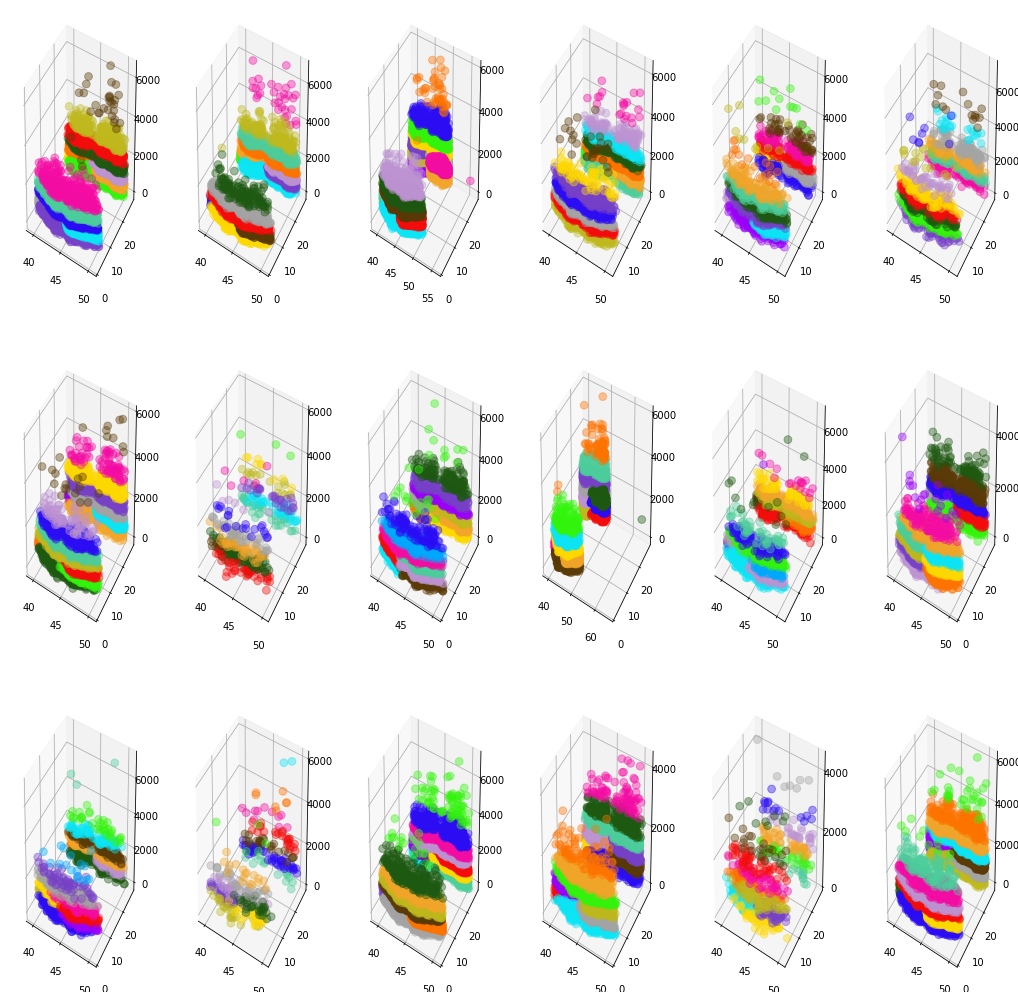

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18,18), subplot_kw={'projection': '3d'})
axs = axes.ravel()

for i in range(18):
    for j in range(spatial_ks[i]):
        axs[i].scatter(df2.loc[(df2.Y1==i) & (df2.Y2==j), 'ra'], df2.loc[(df2.Y1==i) & (df2.Y2==j), 'dec'], 
                       df2.loc[(df2.Y1==i) & (df2.Y2==j), 'r_est'], c=colors[colkeys[j]],
                       s=60, alpha=0.4, label='Cluster {}'.format(j))
    #axs[i].legend(loc='best')
plt.show()

As seen in these plots, the resulting clusters are almost all well separated in the spatial dimensions, with only a few exceptions. Now let's check on the velocity dimensions:

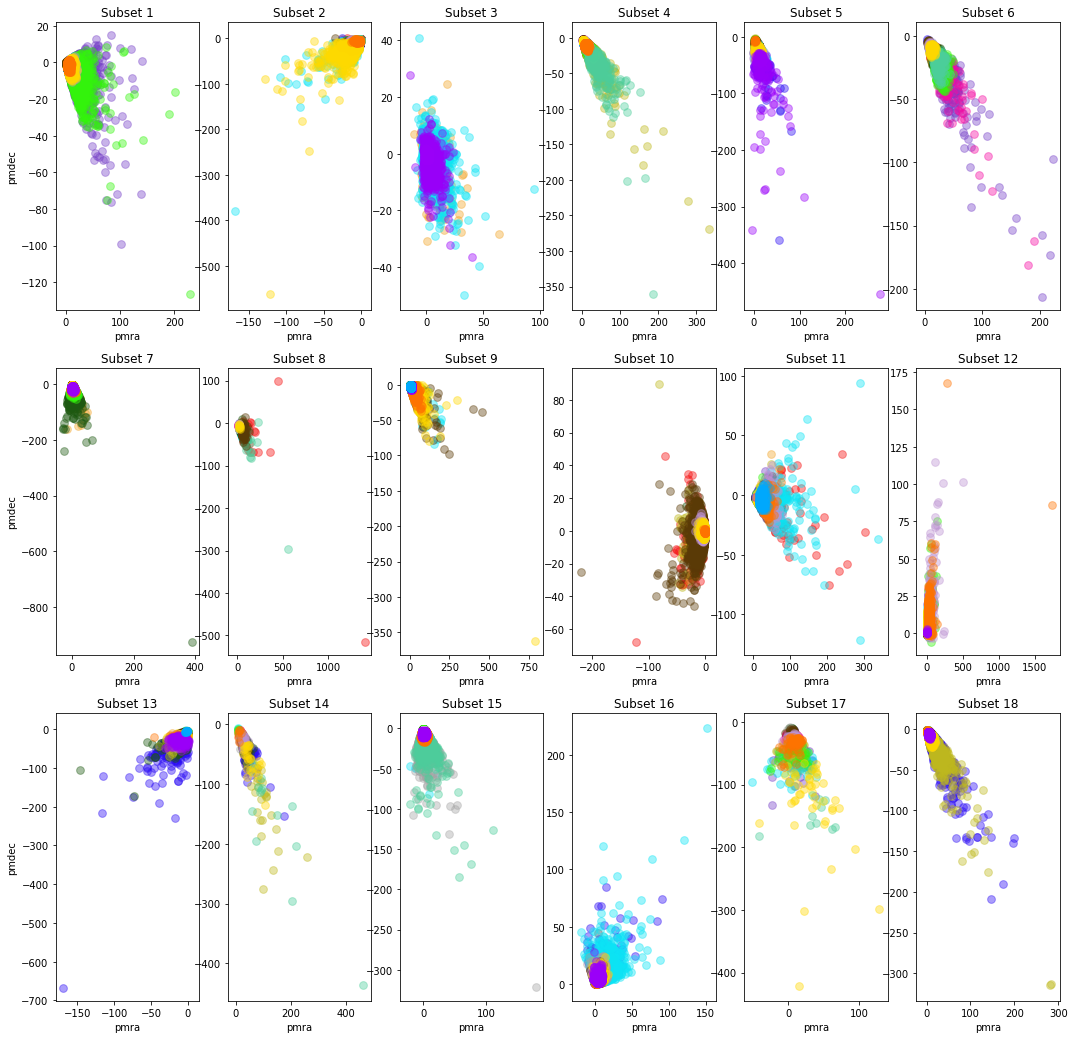

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18,18))
axs = axes.ravel()

for i in range(18):
    for j in range(spatial_ks[i]):
        axs[i].scatter(df2.loc[(df2.Y1==i) & (df2.Y2==j), 'pmra'], df2.loc[(df2.Y1==i) & (df2.Y2==j), 'pmdec'], 
                       c=colors[colkeys[j]],
                       s=60, alpha=0.4, label='Cluster {}'.format(j))
    #axs[i].legend(loc='best')
    if i%6 == 0:
        axs[i].set_ylabel('pmdec')
    axs[i].set_xlabel('pmra')
    axs[i].set_title('Subset {}'.format(i+1))
plt.show()

Indeed, though the velocities in some clusters are a bit spread out, they are still well separated compared to the previous method, as they are spread out in a smaller area. Again, if there was a good method for removing outliers in velocity space, the separations would likely become even more improved. For now at least, I will move on to analyzing just how well this algorithm worked in making realistic stellar clusters.

# Metric Analysis: Did the algorithm work?

The real question is whether or not the clusters found by the KMeans algorithm(s) are realistic compared to known stellar clusters. This is not the easiest question to answer, as clusters can have a variety of properties, but the literature gives us some idea on benchmarks we can look at. Generally, clusters are not too separated in space, and are more-or-less moving together through the Galaxy.

In order to try and quantify the differences between my clusters and typical clusters, I will need to measure the velocity dispersions to see just how similarly they are moving, and to get an idea of the spatial compactness compared to average cluster sizes.

For determining the size of the clusters, I can calculate for each member of a cluster its distance (in parsecs) from the cluster center defined in the KMeans algorithm. This is done in a straightforward manner, as it is just a simple spherical geometry problem:

In [41]:
def calc_stellar_dist(ra1, ra2, dec1, dec2, r_est1, r_est2):
    """
    Calculates the distances between two stars in space (or a star and a cluster center).
    
    """
    
    # Spherical geometric distance(r_est = r, ra = phi, dec = theta):
    dist_sq = (r_est1**2.0) + (r_est2**2.0) - \
               (2*r_est1*r_est2*(np.sin(dec1)*np.sin(dec2)*np.cos(ra1-ra2) + np.cos(dec1)*np.cos(dec2)))
    dist = np.sqrt(dist_sq)
    
    return dist

In [42]:
# For each cluster, calculate the distances of each member to its cluster center, also
# collecting the velocity distributions along the way:
d_dists = {}
pmra_dists = {}
pmdec_dists = {}
cluster_i = 1
data = X[['ra', 'dec', 'r_est', 'pmra', 'pmdec']]
for y1 in range(len(spatial_ks)):
    for y2 in range(spatial_ks[y1]):
        # Get data on all stars in the specific cluster:
        cluster = data.loc[(df2.Y1==y1) & (df2.Y2==y2), :]
        
        # Get cluster center's spatial coordinates:
        center_coords = centers[y1][y2, 0:3]
        center_ra = np.zeros(len(cluster.ra.values)) + ((center_coords[0]/60.)*(np.pi/180.))
        center_dec = np.zeros(len(cluster.ra.values)) + ((center_coords[1]/60.)*(np.pi/180.))
        center_r = np.zeros(len(cluster.ra.values)) + center_coords[2]
        
        # Convert ra and dec into radians from arcminutes:
        ra_rads = (cluster.ra.values / 60.0) * (np.pi/180.)
        dec_rads = (cluster.dec.values / 60.0) * (np.pi/180.)
        
        # Calculate the distances to the center:
        dist_calc = np.vectorize(calc_stellar_dist)
        d_dists[cluster_i] = dist_calc(ra_rads, center_ra, dec_rads, center_dec, 
                                       cluster.r_est.values, center_r)
        
        # Store the velocity distributions too:
        pmra_dists[cluster_i] = cluster.pmra.values
        pmdec_dists[cluster_i] = cluster.pmdec.values
        
        cluster_i += 1


I now have the distance distributions as well as the velocity distributions for each of the 281 clusters. I can use these now to determine the properties of the clusters and how they compare.

In [44]:
# Save these as pickles so if I'm disconnected I can work on them later without re-running everything:
with open('Data/d_dists_kmeans.pkl', 'wb') as f:
    pickle.dump(d_dists, f)
with open('Data/pmra_dists_kmeans.pkl', 'wb') as f:
    pickle.dump(pmra_dists, f)
with open('Data/pmdec_dists_kmeans.pkl', 'wb') as f:
    pickle.dump(pmdec_dists, f)

Cantat-Gaudin et al. (2018) conducted a study to find some stellar clusters in Gaia data, and for the ones they discovered looked at how "compact" the clusters were, but they were not specific about how they defined said compactness. One thought I had was to use a 1-D bootstrap method to compare how compact the cluster is compared to a normal distribution of the same mean distance and standard deviation as my cluster. I will also calculate the velocity dispersions in RA and Dec for each of my clusters, so I can see how realistic they are.

In [45]:
# In order to check on whether the clusters spatially make sense from an astronomical
# perspective, I need to see if it's more compact than a normal distribution. To do that,
# I'll use a bootstrap-with-replacement test:

def bootstrap_1d(data, func):
    """
    This will take a 1d array of data and create a bootstrap replicate
    of the supplied statistical function (mean, median, std, etc.).
    
    """
    
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """
    Draw bootstrap replicates of the supplied statistical function.
    Size here is how many total replicates you wish to draw.
    
    """

    # Initialize array of replicates to be filled:
    bs_replicates = np.empty(size)
    
    # Generate all the replicates and store them
    for i in range(size):
        bs_replicates[i] = bootstrap_1d(data, func)
    
    return bs_replicates

percent_diffs = np.zeros(len(d_dists.keys()))
pmra_disp = percent_diffs.copy()
pmdec_disp = percent_diffs.copy()
for i in d_dists.keys():
    # Let's draw a sufficient number of bootstrap replicates of the standard deviation:
    bs_reps = draw_bs_reps(d_dists[i], np.std, size=10000)
    rep_std = np.mean(bs_reps)
    
    # Compare the percent difference between the two standard deviations:
    stand_dev = np.std(d_dists[i])
    percent_diffs[i-1] = ((rep_std - stand_dev) / stand_dev) * 100.0
    
    # Calculate the velocity dispersions:
    pmra_disp[i-1] = np.std(pmra_dists[i])
    pmdec_disp[i-1] = np.std(pmdec_dists[i])
    
print(percent_diffs)

/Users/danielfeldman/anaconda/envs/gaia/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


[-4.21409433e-02 -9.53673701e-02 -4.87048903e-02 -2.12437075e-02
 -2.37992669e-02 -2.85181475e-01 -1.80691848e-02 -3.42005557e-01
 -7.79395558e-02 -3.77989438e-02 -5.83513364e-02 -2.53154871e+00
 -2.20483281e-02 -2.38155958e-02 -9.03681366e-02 -6.34475967e-02
 -1.06787320e-01 -9.89787407e-02 -6.03001692e-02 -1.69460821e-01
 -2.82911271e+00 -1.11740635e+00 -1.38493488e+00 -9.45294760e-02
 -1.61382949e-01 -1.64479380e-01 -8.16655670e-02 -9.13227298e-02
 -8.22411819e-02 -8.44565292e-02 -4.84854012e-02 -3.25448574e-02
 -6.06563957e-02 -1.91334977e-01 -5.10598879e-02 -1.99335305e-02
 -1.19193630e-02 -3.19816033e-02 -4.52873912e-02 -2.67436853e-02
 -2.80504032e-02 -8.32542524e-03 -2.96419732e-01 -5.55824028e-02
 -1.98046984e+00 -5.10844350e-02 -2.41318163e-01 -4.75505605e-02
 -1.43768511e-01 -1.27786852e-01 -2.76404363e-01 -4.38552858e+00
 -2.32169491e-01 -1.40977906e-01 -1.90629291e-01 -9.60956487e-02
 -1.60520922e-01 -4.23580029e+00 -8.16967898e-01 -1.25593157e+00
 -1.26776938e-01 -2.21952

First, there is one cluster with a nan when I calculated the percent difference between the average standard deviation and that of a normal distribution, and that is because that is a cluster with only 1 member in it, so that can be safely ignored. The results of this calculation show that the distributions are all slightly more compact than a normal distribution, but only by a very small percentage and cannot be easily distinguished between the two. Honestly, I'm not really convinced that this measure is particularly meaningful, and so without a quality description of "compactness", I think it's best to ignore this and instead look at the general size of the clusters.

Most open clusters have cores that are a few parsecs in size, and extended "coronas" that can extend to the tens of parsecs. So I can use a different measurement utilized in Cantat-Gaudin et al. (2018), which is the distance at which 50% of all cluster members fall inside. This r50 can be used as a basic measurement for the cluster's core, and I can just compare that size to typical open clusters. 

I can similarly compare the calculated velocity dispersions with the kinds of typical velocity dispersions found in the literature. Kuhn et al. (2018) measured the velocity dispersions of clusters in the Gaia dataset, and sets a good baseline for comparison of a few kilometers per second for a typical cluster.

In [48]:
print(pmra_disp)
print(pmdec_disp)

[  8.04214609   7.95637254   8.16964291   8.32044156   8.24677523
   8.16203264   8.31250976   8.53925711   8.19774681   8.41067801
   8.72681844   7.59701146   8.07783313   8.40358009   8.36091559
  12.78333909  13.92218654  15.26276679  12.42483571  12.43448564
  12.23812302  13.9558242   10.93129542  12.71589983  12.56454311
  12.69876225  11.95278008  12.48788124  11.82636314  13.5701248
   6.23016641   6.48911878   6.19116389   6.23657623   6.41411468
   6.23693581   6.21032275   6.18843951   6.330708     6.19227105
   6.37934452   6.36645473   6.41928829   6.30463345   6.29327558
   6.34684759  15.76660784  16.61795587  16.53207409  17.11707899
  16.80555521  14.20715423  16.74035275  15.42647025  16.46170343
  17.16311023  16.97723572  16.06957984  16.44142588  16.9532343
  16.0114414   19.84987157  20.65798709  20.69907861  18.4169509
  19.80483288  20.98360735  20.71655299  19.10905567  17.66720414
  18.38178616  22.76575378  21.01604307  18.40150269  17.60609454
  16.31876648

# Text about dispersions

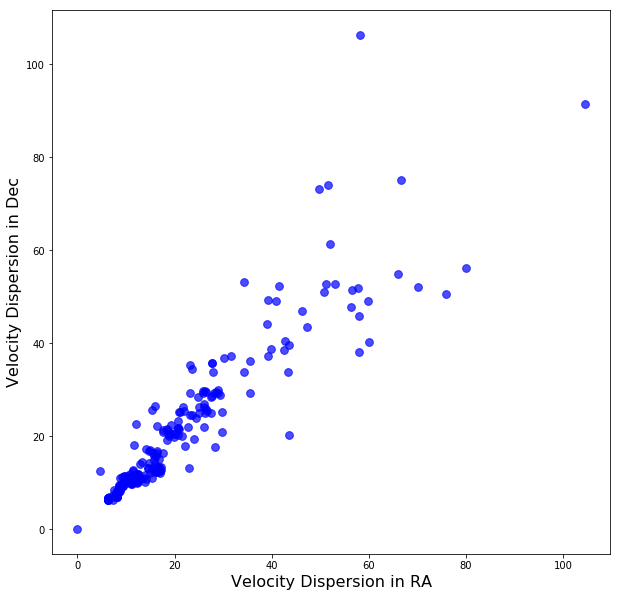

In [59]:
# Plot the dispersions between the two velocities:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(pmra_disp, pmdec_disp, c='blue', s=60, alpha=0.7)
ax.set_xlabel('Velocity Dispersion in RA', fontsize=16)
ax.set_ylabel('Velocity Dispersion in Dec', fontsize=16)
plt.show()

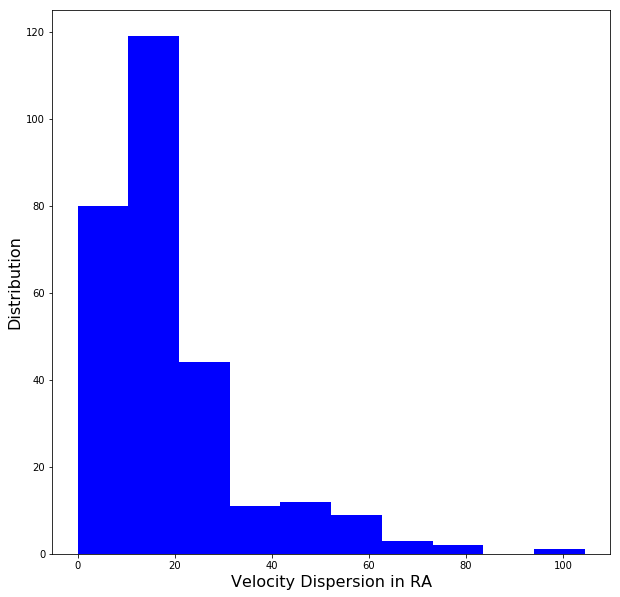

In [64]:
# Plot the Velocity Dispersion (RA) distribution:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.hist(pmra_disp, bins=10, color='blue')
ax.set_xlabel('Velocity Dispersion in RA', fontsize=16)
ax.set_ylabel('Distribution', fontsize=16)
plt.show()

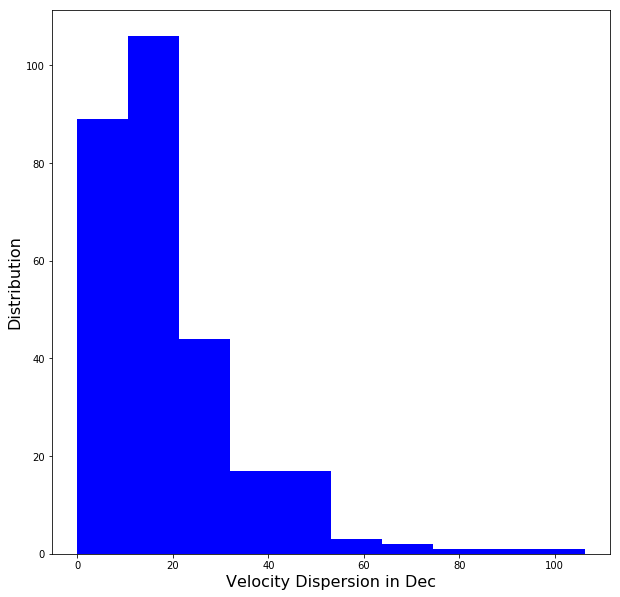

In [65]:
# Plot the Velocity Dispersion (Dec) distribution:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.hist(pmdec_disp, bins=10, color='blue')
ax.set_xlabel('Velocity Dispersion in Dec', fontsize=16)
ax.set_ylabel('Distribution', fontsize=16)
plt.show()

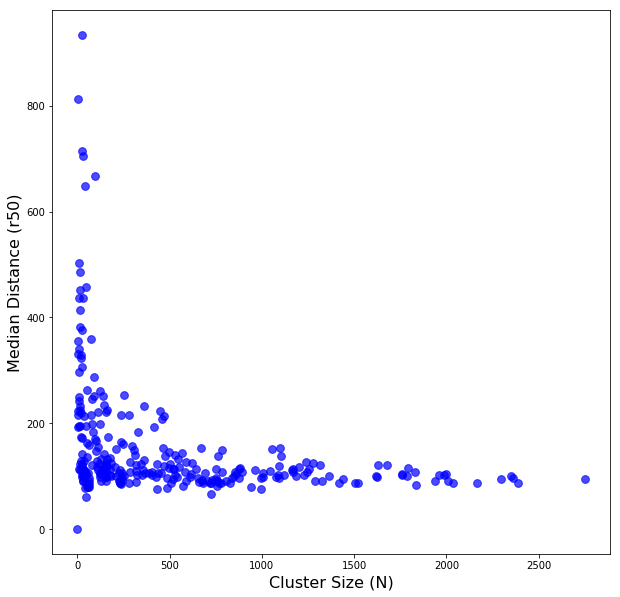

In [51]:
# Calculate the radius (distance) from the center containing 50% of the stars in each cluster:
r_50 = np.zeros(len(d_dists.keys()))
cluster_sizes = r_50.copy()
for i in d_dists.keys():
    r_50[i-1] = np.median(d_dists[i])
    cluster_sizes[i-1] = len(d_dists[i])

# Plot the r_50 versus size of the cluster:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(cluster_sizes, r_50, c='blue', s=60, alpha=0.7)
ax.set_xlabel('Cluster Size (N)', fontsize=16)
ax.set_ylabel('Median Distance (r50)', fontsize=16)
plt.show()

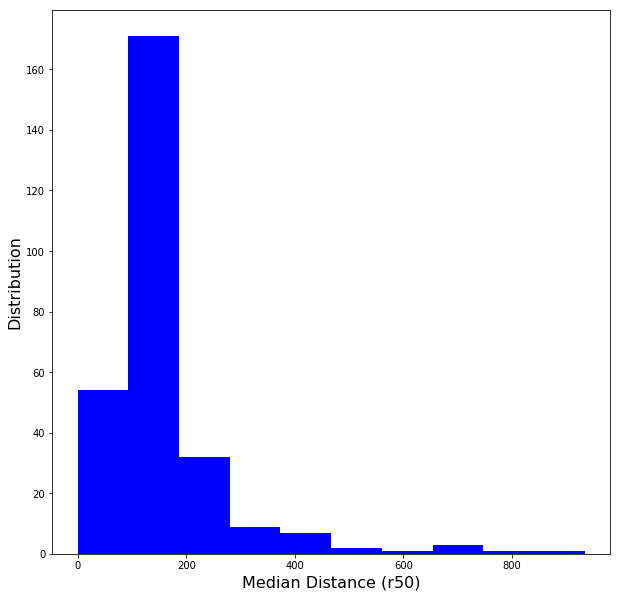

In [56]:
# Plot the r_50 distribution:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.hist(r_50, bins=10, color='blue')
ax.set_xlabel('Median Distance (r50)', fontsize=16)
ax.set_ylabel('Distribution', fontsize=16)
plt.show()

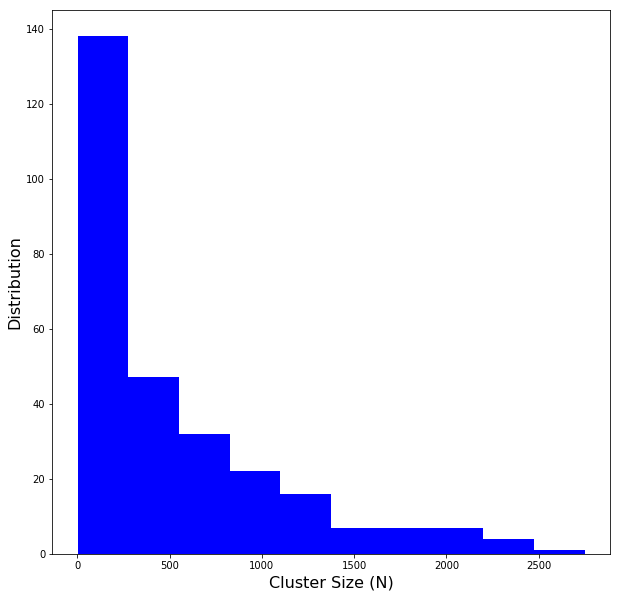

In [57]:
# Plot the cluster size distribution:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.hist(cluster_sizes, bins=10, color='blue')
ax.set_xlabel('Cluster Size (N)', fontsize=16)
ax.set_ylabel('Distribution', fontsize=16)
plt.show()

In [58]:
# Calculate the pearson correlation coefficient between these two variables:
import scipy.stats as st

size_dist = st.pearsonr(cluster_sizes, r_50)
print('Cluster Size (N) vs Median Distance from Cluster Center:\n{}, {}\n'.format(size_dist[0], size_dist[1]))

Cluster Size (N) vs Median Distance from Cluster Center:
-0.3297544959223713, 1.4943339445035722e-08



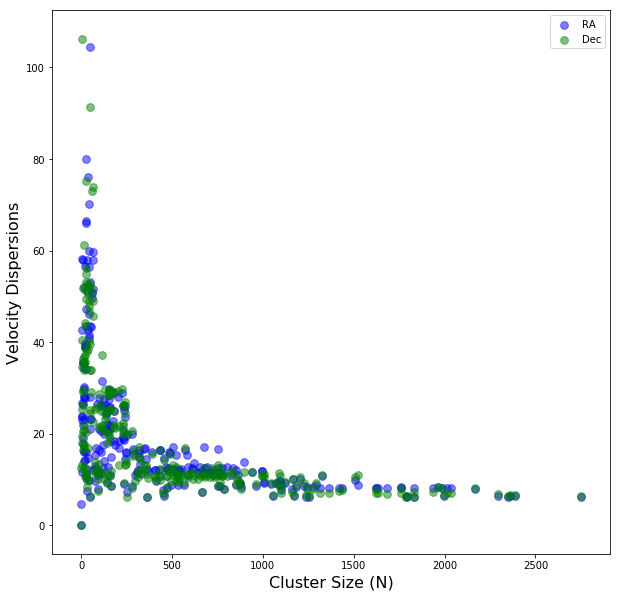

In [62]:
# Plot the velocity dispersions versus size of the cluster:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(cluster_sizes, pmra_disp, c='blue', s=60, alpha=0.5, label='RA')
ax.scatter(cluster_sizes, pmdec_disp, c='green', s=60, alpha=0.5, label='Dec')
ax.set_xlabel('Cluster Size (N)', fontsize=16)
ax.set_ylabel('Velocity Dispersions', fontsize=16)
plt.legend(loc='best')
plt.show()

In [63]:
# More Pearson_r calculations, this time for dispersions:
size_pmra = st.pearsonr(cluster_sizes, pmra_disp)
print('Cluster Size (N) vs Velocity Dispersion in RA:\n{}, {}\n'.format(size_pmra[0], size_pmra[1]))

size_pmdec = st.pearsonr(cluster_sizes, pmdec_disp)
print('Cluster Size (N) vs Velocity Dispersion in Dec:\n{}, {}\n'.format(size_pmdec[0], size_pmdec[1]))

pmra_pmdec = st.pearsonr(pmra_disp, pmdec_disp)
print('Velocity Dispersion in Dec vs Velocity Dispersion in RA:\n{}, {}\n'.format(pmra_pmdec[0], pmra_pmdec[1]))

Cluster Size (N) vs Velocity Dispersion in RA:
-0.5055682371386178, 1.223566461094977e-19

Cluster Size (N) vs Velocity Dispersion in Dec:
-0.5092394145144202, 6.033908134840615e-20

Velocity Dispersion in Dec vs Velocity Dispersion in RA:
0.9230688070110693, 8.746188602158069e-118

